In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os
import numpy
from scipy import special
import healpy
import fitsio
import astropy.coordinates as apco
import gaia_tools.load
from galpy.util import bovy_plot, bovy_coords
%pylab inline
from matplotlib.colors import LogNorm
import seaborn as sns
from matplotlib import cm
save_figures= False
numpy.random.seed(1)

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# An exploration of the *Gaia* selection function

## *TGAS* properties: color-color, color-magnitude

Let's look at some data relevant to the *Gaia* DR1 selection function, specifically that of the TGAS subset.

In [3]:
tgas= gaia_tools.load.tgas()
# Other data downloaded from Dustin Lang's http://portal.nersc.gov/project/cosmo/temp/dstn/gaia/
apass= fitsio.read(os.path.join(os.getenv('GAIA_TOOLS_DATA'),'Gaia','dstn_match','tgas-matched-apass-dr9.fits'))
bv= (apass['bmag']-apass['vmag'])
twomass= fitsio.read(os.path.join(os.getenv('GAIA_TOOLS_DATA'),'Gaia','dstn_match','tgas-matched-2mass.fits.gz'))
jk= twomass['j_mag']-twomass['k_mag']
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
print("%i TGAS stars, %i 2MASS matches (%i missing), %i APASS matches (%i missing)" \
          % (len(tgas),numpy.sum(twomass['matched']),len(tgas)-numpy.sum(twomass['matched']),
             numpy.sum((True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
                        *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)),
            len(tgas)-numpy.sum((True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
                        *(apass['vmag'] != 0.)*(apass['bmag'] != 0.))))

2057050 TGAS stars, 2052625 2MASS matches (4425 missing), 1737971 APASS matches (319079 missing)


A few color-color plots

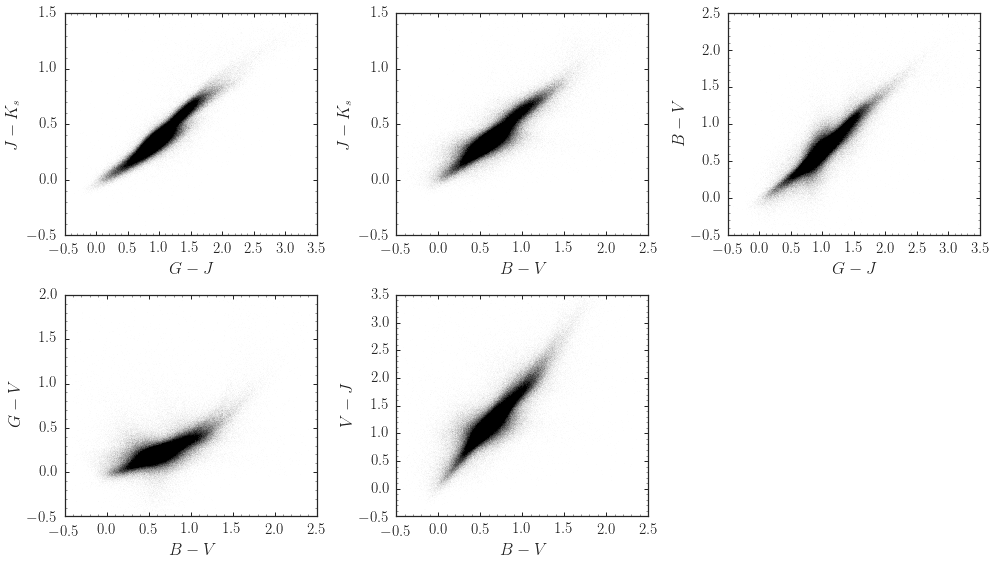

In [4]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(14,8)
alpha=0.01
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-0.5,1.5],
                    xlabel=r'$G-J$',ylabel=r'$J-K_s$')
subplot(2,3,2)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-.5,2.5],yrange=[-0.5,1.5],
                    xlabel=r'$B-V$',ylabel=r'$J-K_s$')
subplot(2,3,3)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-0.5,2.5],
                    xlabel=r'$G-J$',ylabel=r'$B-V$')
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-tgas['phot_g_mean_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-0.5,2.],
                    xlabel=r'$B-V$',ylabel=r'$G-V$')
subplot(2,3,5)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-0.5,3.5],
                    xlabel=r'$B-V$',ylabel=r'$V-J$')
tight_layout()

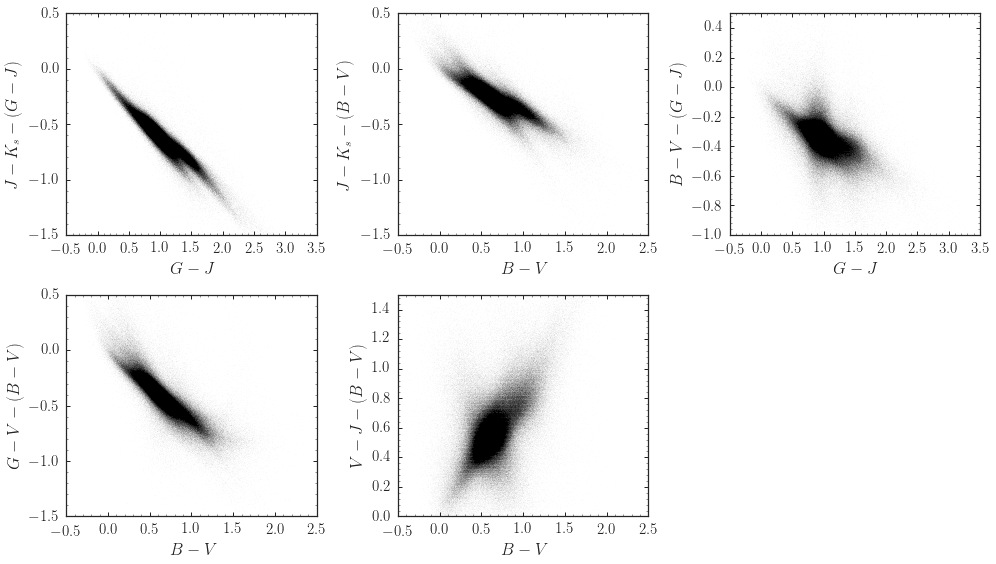

In [5]:
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,xtick_labelsize=15.,ytick_labelsize=15.)
figsize(14,8)
alpha=0.01
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched]-(tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-1.5,0.5],
                    xlabel=r'$G-J$',ylabel=r'$J-K_s-(G-J)$')
subplot(2,3,2)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (twomass['j_mag']-twomass['k_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-.5,2.5],yrange=[-1.5,0.5],
                    xlabel=r'$B-V$',ylabel=r'$J-K_s-(B-V)$')
subplot(2,3,3)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    (apass['bmag']-apass['vmag'])[matched]-(tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,3.5],yrange=[-1.,0.5],
                    xlabel=r'$G-J$',ylabel=r'$B-V-(G-J)$')
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-tgas['phot_g_mean_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[-1.5,0.5],
                    xlabel=r'$B-V$',ylabel=r'$G-V-(B-V)$')
subplot(2,3,5)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],
                    (apass['vmag']-twomass['j_mag'])[matched]-(apass['bmag']-apass['vmag'])[matched],
                    'k,',gcf=True,alpha=alpha,
                    xrange=[-0.5,2.5],yrange=[0.,1.5],
                    xlabel=r'$B-V$',ylabel=r'$V-J-(B-V)$')
tight_layout()

A few color-magnitude plots

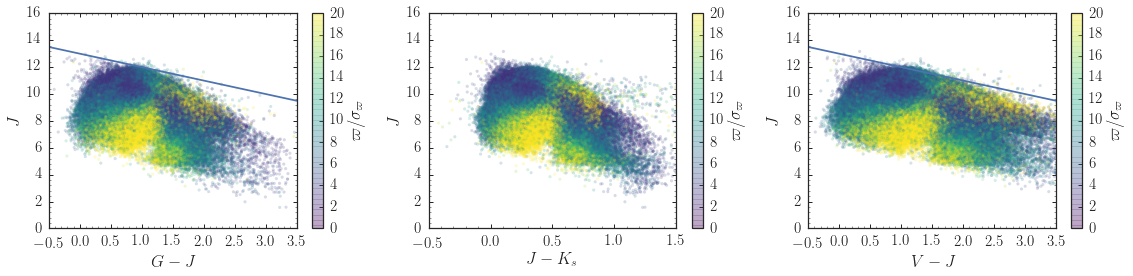

In [6]:
figsize(16,4)
subplot(1,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(1,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
tight_layout()

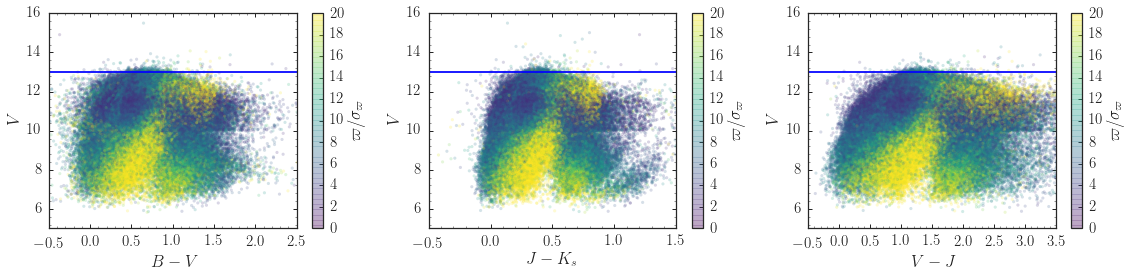

In [7]:
figsize(16,4)
subplot(1,3,1)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(1,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

The selection function appears to be best behaved in $(B-V,V)$, but is relatively rectangular in the A and F star region in $(J-K_s,J)$, which is good news. Let's see what this looks like for relative-parallax-uncertainty cut of $10\,\%$:

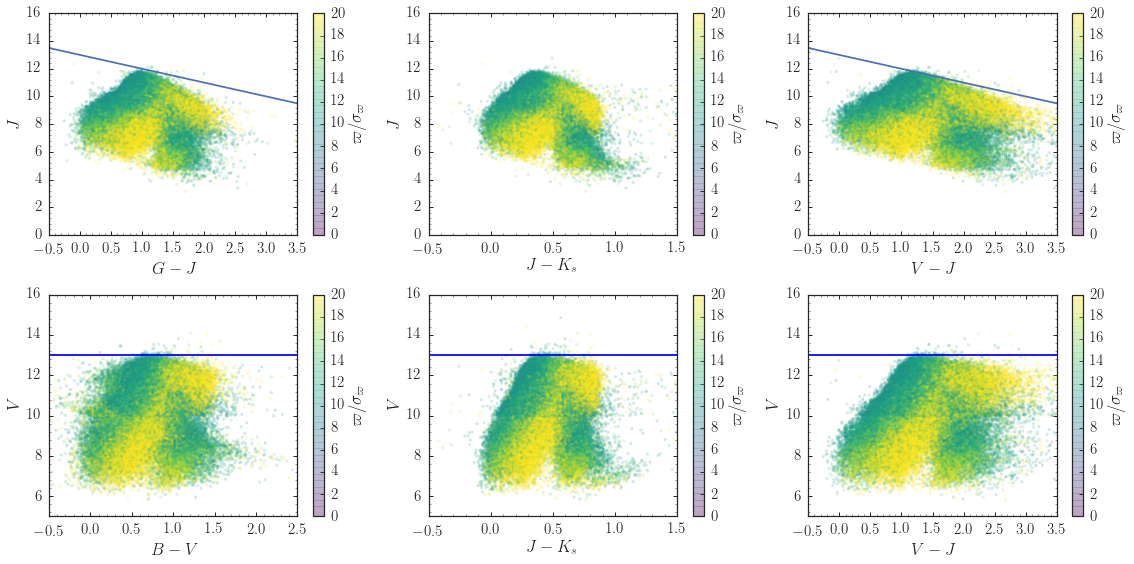

In [8]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

Now, a rather steep dependence on color is introduced, pivoting at $(J-K_s) \approx 0.3$. How about for a less restrictive cut?

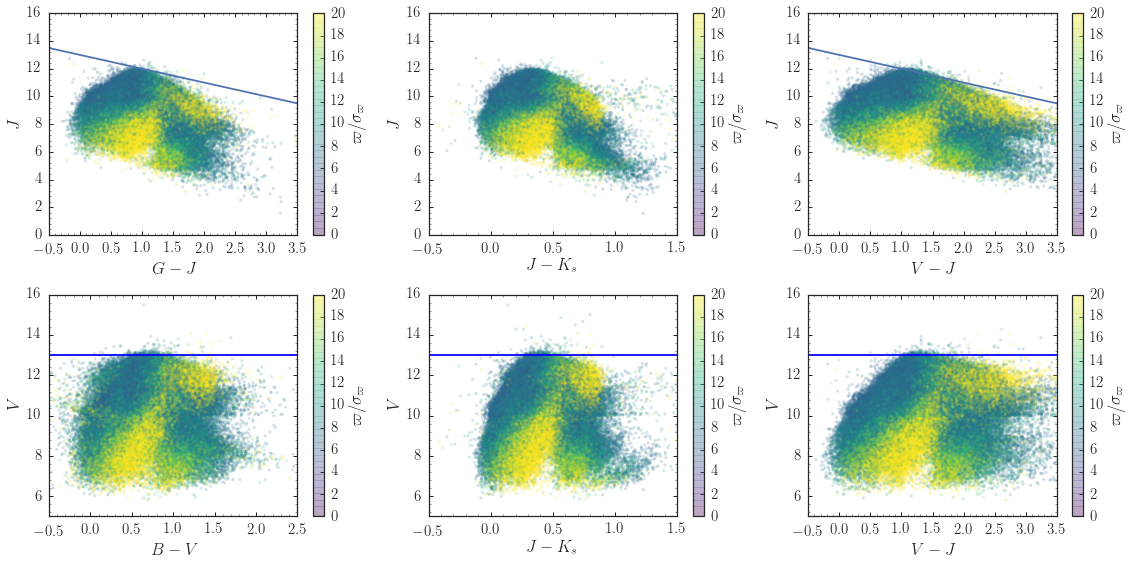

In [9]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 6.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

And an even more restrictive cut?

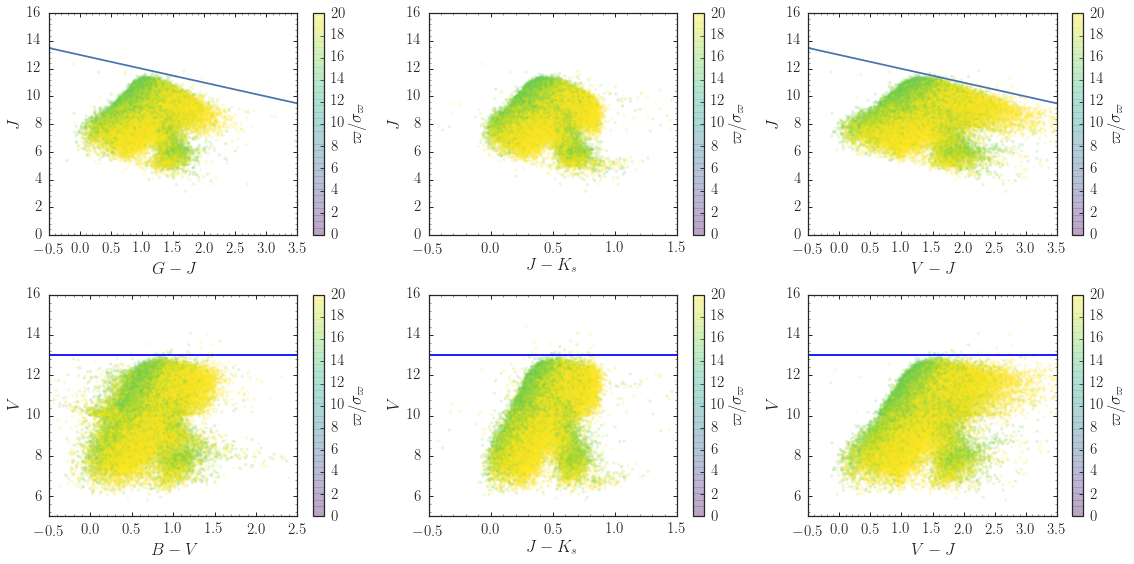

In [10]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 15.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((tgas['phot_g_mean_mag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$G-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
gjs= numpy.linspace(-0.5,3.5,101)
plot(gjs,13.-gjs)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
vjs= numpy.linspace(-0.5,3.5,101)
plot(vjs,13.-vjs)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

Maybe we should be looking in $G$

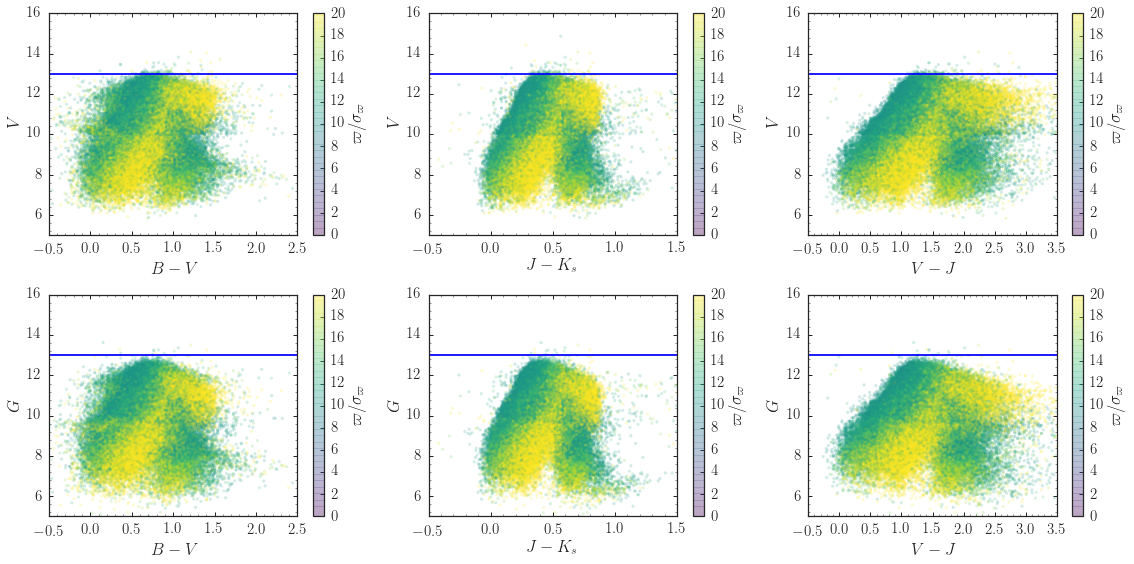

In [11]:
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
figsize(16,8)
subplot(2,3,1)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,3)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],apass['vmag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$V$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,4)
bovy_plot.bovy_plot((apass['bmag']-apass['vmag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,2.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$B-V$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,5)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
subplot(2,3,6)
bovy_plot.bovy_plot((apass['vmag']-twomass['j_mag'])[matched],tgas['phot_g_mean_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,3.5],yrange=[5.,16.],alpha=0.2,
                    xlabel=r'$V-J$',ylabel=r'$G$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axhline(13.)
tight_layout()

$V$ works if anything a little better than $G$. Let's focus on the $(J-K_s,J)$ distribution and see whether we can delineate the border:

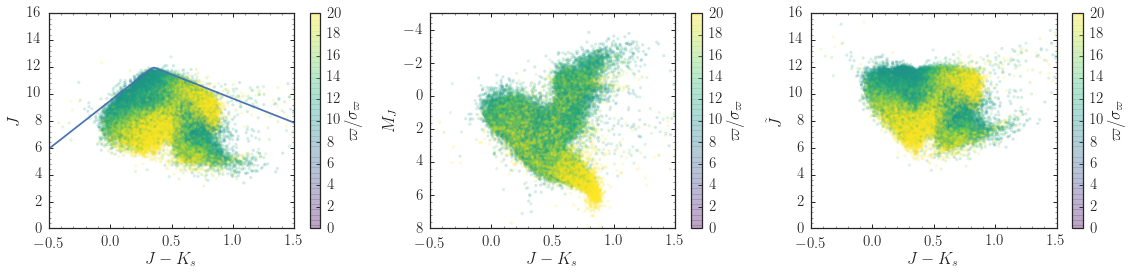

In [12]:
figsize(16,4)
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
subplot(1,3,1)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
jks= numpy.linspace(-0.5,1.5,101)
def jkbound(jk,jmax=12.):
    if isinstance(jk,float):
        jk= numpy.array([jk])
    out= numpy.empty_like(jk)
    pivot= 0.35
    out[jk < pivot]= 2.5/0.35*(jk[jk<pivot]-pivot)+jmax
    out[jk >= pivot]= -1.8/0.5*(jk[jk >= pivot]-pivot)+jmax
    return out
plot(jks,jkbound(jks))
dm= -5.*numpy.log10(tgas['parallax'])+10.
subplot(1,3,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched]-dm[matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[8.,-5.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$M_J$',clabel=r'$\varpi/\sigma_\varpi$')
subplot(1,3,3)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],
                    twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$',clabel=r'$\varpi/\sigma_\varpi$')
tight_layout()

Here's the full NIR HR diagram for these stars:

A0-A9 = 5547, F0-5 = 19560, F5-9= 76420


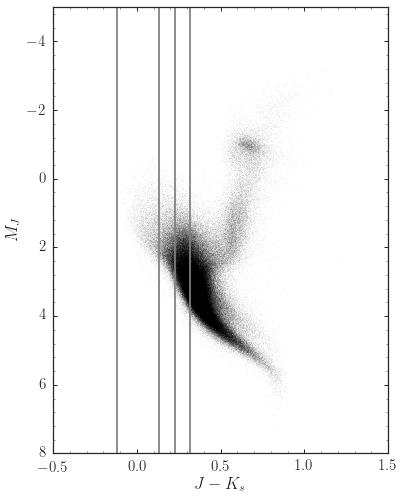

In [13]:
figsize(6,8)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched]-dm[matched],'k,',
                    xrange=[-0.5,1.5],yrange=[8.,-5.],alpha=0.03,
                    xlabel=r'$J-K_s$',ylabel=r'$M_J$',clabel=r'$\varpi/\sigma_\varpi$')
pyplot.axvline(-0.12,color='0.5')
pyplot.axvline(0.13,color='0.5')
pyplot.axvline(0.23,color='0.5')
pyplot.axvline(0.315,color='0.5')
print("A0-A9 = %i, F0-5 = %i, F5-9= %i" % (\
      numpy.sum(matched*(jk > -0.12)*(jk < 0.13)),
      numpy.sum(matched*(jk > 0.13)*(jk < 0.23)),
      numpy.sum(matched*(jk > 0.23)*(jk < 0.315))))

Notice the offset main-sequence due to binaries. Below is the absolute magnitude distribution in a color slice in blue and the same distribution offset by a factor of two in brightness with a weight of 20% in green. The green distribution explains the second peak around $M_J=4.5$ (the red flips the blue histogram around the $M_J \approx5$ peak to show the effect of the uncertainties):

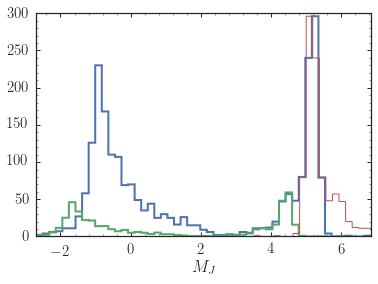

In [14]:
figsize(6,4)
jk= twomass['j_mag']-twomass['k_mag']
aindx= (jk > 0.7)*(jk < 0.725)
_= bovy_plot.bovy_hist((twomass['j_mag']-dm)[matched*aindx],bins=51,histtype='step',lw=2.,xlabel=r'$M_J$')
_= hist((-0.75+twomass['j_mag']-dm)[matched*aindx],bins=51,histtype='step',lw=2.,
        weights=0.2*numpy.ones(numpy.sum(matched*aindx)))
_= hist((10.35-twomass['j_mag']+dm)[matched*aindx],bins=51,histtype='step',lw=1.)

How does this perform on a more restrictive cut?

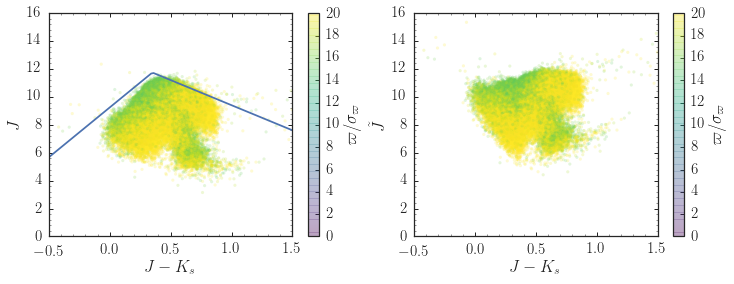

In [15]:
figsize(12,4)
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 15.)
subplot(1,2,1)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$J$',clabel=r'$\varpi/\sigma_\varpi$')
jks= numpy.linspace(-0.5,1.5,101)
plot(jks,jkbound(jks,jmax=11.75))
subplot(1,2,2)
bovy_plot.bovy_plot((twomass['j_mag']-twomass['k_mag'])[matched],
                    twomass['j_mag'][matched]+11.75-jkbound((twomass['j_mag']-twomass['k_mag'])[matched],jmax=11.75),
                    c=(tgas['parallax']/tgas['parallax_error'])[matched],s=10.,edgecolors='None',
                    scatter=True,cmap='viridis',vmin=0.,vmax=20.,crange=[0.,20.],colorbar=True,gcf=True,
                    xrange=[-0.5,1.5],yrange=[0.,16.],alpha=0.2,
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$',clabel=r'$\varpi/\sigma_\varpi$')

## 2MASS counts

We can query the 2MASS database to get counts in 2MASS $(J-K_s,J)$ space, to get a sense of how severe the *TGAS* selection is. The following query gets these histograms in SQL:

In [16]:
# The following needs to be performed on the server with the 2MASS database, note that the " might get messed up
"""
import psycopg2
conn= psycopg2.connect("dbname=catalogs user=postgres")
cur= conn.cursor()
cur.execute("select floor(j_m*10), floor((j_m-k_m)*20), count(*) as count \
from twomass_psc \
where ((ph_qual like 'A__' OR (rd_flg like '1__' OR rd_flg like '3__')) \
AND (ph_qual like '__A' OR (rd_flg like '__1' OR rd_flg like '__3')) AND use_src='1' AND ext_key is null) \
group by floor(j_m*10),floor((j_m-k_m)*20) \
order by floor(j_m*10) ASC;")
import numpy
a= numpy.array(cur.fetchall(),dtype='float')
numpy.savetxt('2massc_jk_j.txt',a)
"""
a= numpy.loadtxt('2massc_jk_j.txt').T

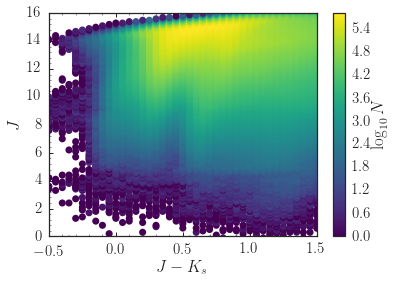

In [17]:
figsize(6,4)
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.,c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$J$')

Note how the completeness limit around $K_s = 14.3$ is hit at the blue end. Same with the TGAS $\varpi/\sigma_\varpi > 10$ sample overlaid:

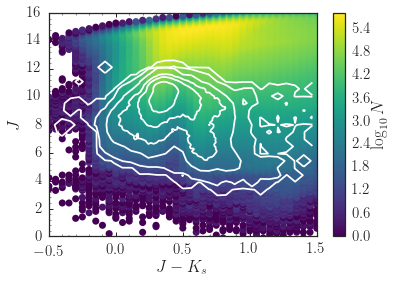

In [18]:
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.,c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$J$')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
# Two different kinds of binnings
levels= list(special.erf(numpy.arange(1,4)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=101)
levels= list(special.erf(numpy.arange(4,7)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],twomass['j_mag'][matched],
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=31)

How does this look in the transformed color system?

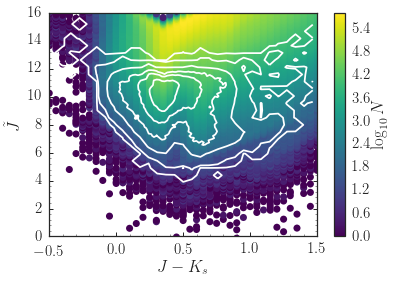

In [19]:
bovy_plot.bovy_plot(a[1]/20.,a[0]/10.+12.-jkbound(a[1]/20.),
                    c=numpy.log10(a[2]),
                    scatter=True,s=50.,edgecolors='None',
                    cmap='viridis',colorbar=True,clabel=r'$\log_{10}N$',
                    xrange=[-0.5,1.5],yrange=[0.,16.],
                    xlabel=r'$J-K_s$',ylabel=r'$\tilde{J}$')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
# Two different kinds of binnings
levels= list(special.erf(numpy.arange(1,4)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],
                      twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=101)
levels= list(special.erf(numpy.arange(4,7)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((twomass['j_mag']-twomass['k_mag'])[matched],
                      twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                      overplot=True,xrange=[-0.5,1.5],yrange=[0.,16.],
                      justcontours=True,cntrcolors='w',levels=levels,bins=31)

This distribution does seem to indicate that the selection function for the $\varpi / \sigma_\varpi > 10$ sample is roughly independent of color in $\tilde{J}$, with simply a sharp cut in $\tilde{J}$. The histogram in $J$ is

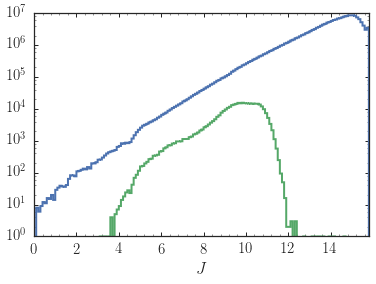

In [20]:
_= bovy_plot.bovy_hist(a[0][True-numpy.isnan(a[0])]/10.,weights=a[2][True-numpy.isnan(a[0])],
                       histtype='step',lw=2.,
                       range=[0.,15.8],bins=158,
                       xlabel=r'$J$')
pyplot.gca().set_yscale('log')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *twomass['matched']\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
#            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
_= bovy_plot.bovy_hist(twomass['j_mag'][matched],range=[0.,15.8],bins=158,overplot=True,lw=2.,histtype='step')

and that in $\tilde{J}$:

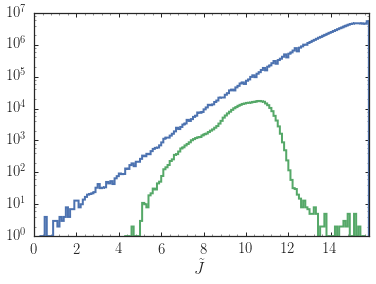

In [21]:
_= bovy_plot.bovy_hist((a[0]/10.+12.-jkbound(a[1]/20.)),weights=a[2],
                       histtype='step',lw=2.,
                       range=[0.,15.8],bins=158,
                       xlabel=r'$\tilde{J}$')
pyplot.gca().set_yscale('log')
matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
            *twomass['matched']\
#            *(tgas['parallax'] > 2.)
matched= matched*(tgas['parallax']/tgas['parallax_error'] > 10.)
matched*= (True-numpy.isnan(twomass['j_mag']))*(True-numpy.isnan(twomass['k_mag']))
_= bovy_plot.bovy_hist(twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                       range=[0.,15.8],bins=158,overplot=True,lw=2.,histtype='step')

The ratios are:

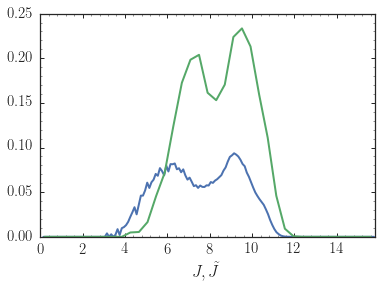

In [22]:
# J
h2,e2= numpy.histogram(a[0][True-numpy.isnan(a[0])]/10.,
                       weights=a[2][True-numpy.isnan(a[0])],
                       range=[0.,15.8],bins=158)
ht, et= numpy.histogram(twomass['j_mag'][matched],range=[0.,15.8],bins=158)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.25],lw=2.,
                   xlabel=r'$J, \tilde{J}$')
h2,e2= numpy.histogram((a[0]/10.+12.-jkbound(a[1]/20.)),weights=a[2],
                          range=[0.,15.8],bins=158//4)
ht, et= numpy.histogram(twomass['j_mag'][matched]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[matched]),
                        range=[0.,15.8],bins=158//4)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,overplot=True,
                   xrange=[0.,15.8],yrange=[0.,0.25],lw=2.)

The ratio in different color bins for $J$ again shows that the selection function has a strong color dependence in $J$:

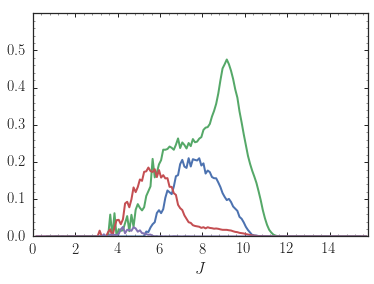

In [23]:
# J
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.6],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

The selection function in $\tilde{J}$, however, also has a strong color dependence, so going to $\tilde{J}$ doesn't seem to work very well.

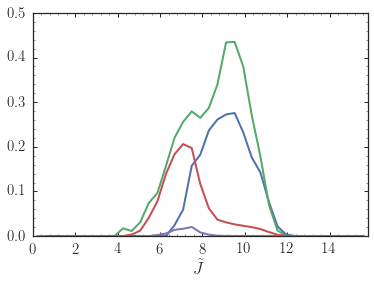

In [24]:
# Jtilde
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram((a[0]/10.+12.-jkbound(a[1]/20.))[taindx],weights=a[2][taindx],
                           range=[0.,15.8],bins=158//4)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx]+12.-jkbound((twomass['j_mag']-twomass['k_mag'])[ttindx]),
                            range=[0.,15.8],bins=158//4)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.5],lw=2.,overplot=overplot,
                       xlabel=r'$\tilde{J}$')
    overplot= True

In color-bins for A and F stars:

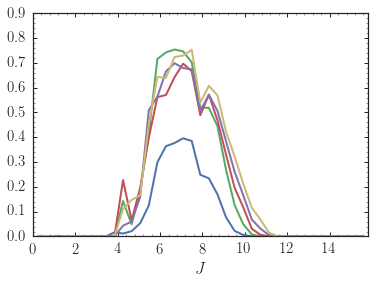

In [25]:
# J
figsize(6,4)
jkmins= [-0.13,0.12,0.18,0.23,0.275]
jkmaxs= [0.12,0.18,0.23,0.275,0.315]
matched= twomass['matched']*(tgas['parallax']/tgas['parallax_error'] > 10.)
overplot= False
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158//4)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158//4)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.9],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

The selection functions of the F stars (four non-blue curves) appear to be very similar, except that the upper cut off has a slight color dependence. Let's try to correct for this with a linear color term:

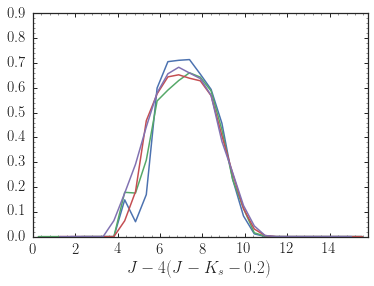

In [26]:
# J
figsize(6,4)
jkmins= [0.12,0.18,0.23,0.275]
jkmaxs= [0.18,0.23,0.275,0.315]
matched= twomass['matched']*(tgas['parallax']/tgas['parallax_error'] > 10.)
overplot= False
jkslope= 4.
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram((a[0]/10.-(a[1]/20-0.2)*jkslope)[taindx],weights=a[2][taindx],
                           range=[0.,15.8],bins=158//5)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram((twomass['j_mag']-(jk-0.2)*jkslope)[ttindx],range=[0.,15.8],bins=158//5)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,0.9],lw=1.5,overplot=overplot,
                       xlabel=r'$J-4(J-K_s-0.2)$')
    overplot= True

This appears to work well at the fainter end, but the bright tail now has a slight color dependence.

How about without any parallax uncertainty cut or demanding APASS photometry?

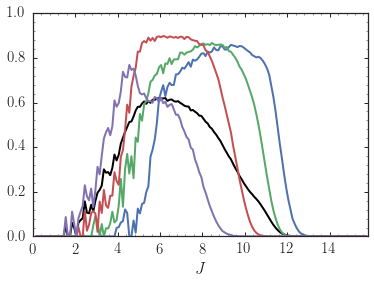

In [27]:
# J
#matched= (True-numpy.isnan(apass['vmag']))*(True-numpy.isnan(apass['bmag']))\
#            *(apass['vmag'] != 0.)*(apass['bmag'] != 0.)\
#            *twomass['matched']
matched= twomass['matched']
# Full sample
h2,e2= numpy.histogram(a[0][True-numpy.isnan(a[0])]/10.,
                       weights=a[2][True-numpy.isnan(a[0])],
                       range=[0.,15.8],bins=158)
ht, et= numpy.histogram(twomass['j_mag'][matched],range=[0.,15.8],bins=158)
js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
bovy_plot.bovy_plot(js,ht/h2,'k',
                   xrange=[0.,15.8],yrange=[0.,1.],lw=2.,
                   xlabel=r'$J$')
jkmins= [-0.2,0.2,0.6,1.]
jkmaxs= [0.2,0.6,1.,1.4]
overplot= True
for jkmi, jkma in zip(jkmins,jkmaxs):
    taindx= (True-numpy.isnan(a[0]))*(a[1]/20. >= jkmi)*(a[1]/20. < jkma)
    h2,e2= numpy.histogram(a[0][taindx]/10.,weights=a[2][taindx],
                           range=[0.,15.8],bins=158)
    ttindx= matched*(jk >= jkmi)*(jk < jkma)
    ht, et= numpy.histogram(twomass['j_mag'][ttindx],range=[0.,15.8],bins=158)
    js= 0.5*(numpy.roll(e2,-1)+e2)[:-1]
    bovy_plot.bovy_plot(js,ht/h2,
                   xrange=[0.,15.8],yrange=[0.,1.],lw=2.,overplot=overplot,
                       xlabel=r'$J$')
    overplot= True

# The spatial part of the *Gaia* *TGAS* selection function

The number of observations as a function of position on the sky is:

In [69]:
full_tgas= gaia_tools.load.tgas()
nside= 2**5
nobs= numpy.zeros(healpy.nside2npix(nside))
sid= (full_tgas['source_id']/2**(35.+2*(12.-numpy.log2(nside)))).astype('int')
nobs, e= numpy.histogram(sid,range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                         weights=(full_tgas['astrometric_n_good_obs_al'])/9.)
nobs2, e= numpy.histogram(sid,range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                          weights=((full_tgas['astrometric_n_good_obs_al'])/9.)**2.)
nstar, e= numpy.histogram(sid,range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside))
nobs/= nstar
nobs_std= numpy.sqrt(nobs2/nstar-nobs**2.)

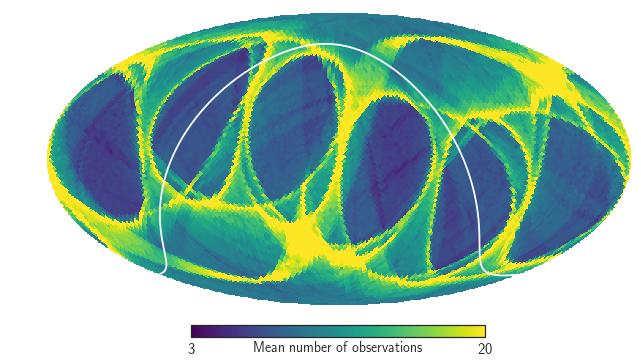

In [70]:
cmap= cm.viridis
cmap.set_under('w')
healpy.mollview(nobs,nest=True,unit='Mean number of observations',cmap=cmap,min=3.,max=20.,title="")
ls= numpy.linspace(0.,2.*numpy.pi,201)
radecs= bovy_coords.lb_to_radec(ls,numpy.zeros_like(ls))
thetas= numpy.pi/2.-radecs[:,1]
healpy.projplot(thetas,radecs[:,0],'w')

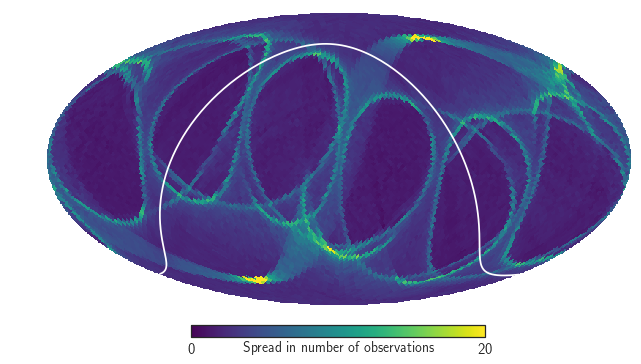

In [71]:
cmap= cm.viridis
cmap.set_under('w')
healpy.mollview(nobs_std,nest=True,unit='Spread in number of observations',cmap=cmap,min=0.,max=20.,title="")
ls= numpy.linspace(0.,2.*numpy.pi,201)
radecs= bovy_coords.lb_to_radec(ls,numpy.zeros_like(ls))
thetas= numpy.pi/2.-radecs[:,1]
healpy.projplot(thetas,radecs[:,0],'w')

Let's now look at the ratio 2MASS/TGAS over the entire sphere over $0.0 < J-K_s < 0.8$ and $6 < J < 10$. The *TGAS* counts are:

In [72]:
# The following needs to be performed on the server with the 2MASS database, note that the " might get messed up
"""
import psycopg2
conn= psycopg2.connect("dbname=catalogs user=postgres")
cur= conn.cursor()
cur.execute("select floor(hp12index/4096), count(*) as count \
from twomass_psc, twomass_psc_hp12 \
where (twomass_psc.pts_key = twomass_psc_hp12.pts_key \
AND (ph_qual like 'A__' OR (rd_flg like '1__' OR rd_flg like '3__')) \
AND (ph_qual like '__A' OR (rd_flg like '__1' OR rd_flg like '__3')) AND use_src='1' AND ext_key is null \
AND (j_m-k_m) > 0.0 AND (j_m-k_m) < 0.8 AND j_m > 6 AND j_m < 10) \
group by floor(hp12index/4096) \
order by floor(hp12index/4096) ASC;")
import numpy
a= numpy.array(cur.fetchall(),dtype='float')
numpy.savetxt('2massc_hp6.txt',a)
"""
a= numpy.loadtxt('2massc_hp6.txt').T
ta= numpy.zeros((2,healpy.nside2npix(2**6)))
ta[0][a[0].astype('int')]= a[0]
ta[1][a[0].astype('int')]= a[1]
a= ta
if nside != 2**6:
    down= (2**6/nside)**2
    n2= numpy.sum(a[1].reshape((len(a[1])//down,down)),axis=1)
    ta= numpy.empty((2,healpy.nside2npix(nside)))
    ta[0]= numpy.arange(healpy.nside2npix(nside))
    ta[1]= n2
    a= ta
full_twomass= fitsio.read(os.path.join(os.getenv('GAIA_TOOLS_DATA'),'Gaia','dstn_match','tgas-matched-2mass.fits.gz'))
full_jk= full_twomass['j_mag']-full_twomass['k_mag']
nstar, e= numpy.histogram(sid[(full_jk > 0.)*(full_jk < 0.8)*(full_twomass['j_mag'] > 6.)*(full_twomass['j_mag'] < 10.)],
                          range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside))

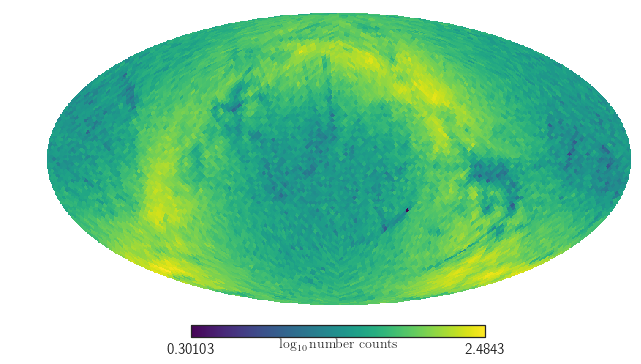

In [73]:
healpy.mollview(numpy.log10(nstar),nest=True,unit=r'$\log_{10} \mathrm{number\ counts}$',cmap=cmap,title="")

The 2MASS counts are:

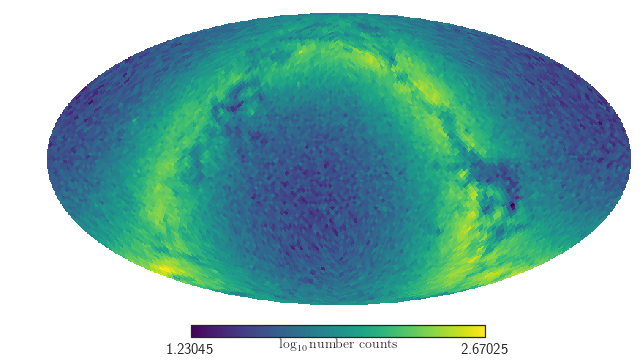

In [74]:
healpy.mollview(numpy.log10(a[1]),nest=True,unit=r'$\log_{10} \mathrm{number\ counts}$',cmap=cmap,title="")

The ratio is:

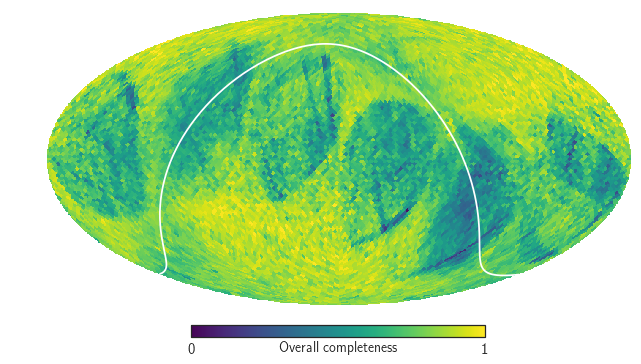

In [75]:
healpy.mollview(nstar/a[1],nest=True,unit='Overall completeness',cmap=cmap,min=0.,max=1.,title="")
ls= numpy.linspace(0.,2.*numpy.pi,201)
radecs= bovy_coords.lb_to_radec(ls,numpy.zeros_like(ls))
thetas= numpy.pi/2.-radecs[:,1]
healpy.projplot(thetas,radecs[:,0],'w')

This has a lot of structure in it, but it largely appears to be due to the mission operations (e.g., the scanning law), rather than due to Galactic astrophysics. Let's look at the following factors that might affect the completeness:

(a) The number of observations in a pixel;

(b) The concentration of scan directions;

(c) The mean parallax uncertainty;

(d) The mean color $J-K_s$;

(e) The mean $J$.

In the following set of plots, the top-left panel is color-coded by the mean parallax uncertainty and the bottom-left panel is color-coded by the number of observations:

In [81]:
findx= (full_jk > 0.)*(full_jk < 0.8)*(full_twomass['j_mag'] > 6.)*(full_twomass['j_mag'] < 10.)
mplxerr, e= numpy.histogram(sid[findx],range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                            weights=(full_tgas['parallax_error'][findx]))
mplxerr/= nstar
mj, e= numpy.histogram(sid[findx],range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                       weights=full_twomass['j_mag'][findx])
mj/= nstar
mjk, e= numpy.histogram(sid[findx],
                        range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                        weights=(full_twomass['j_mag']-full_twomass['k_mag'])[findx])
mjk/= nstar
mscd, e= numpy.histogram(sid[findx],
                        range=[-0.5,healpy.nside2npix(nside)-0.5],bins=healpy.nside2npix(nside),
                        weights=full_tgas['scan_direction_strength_k4'][findx])
mscd/= nstar
# Also compute ecliptic coordinates
tmp_decs, ras= healpy.pix2ang(nside,numpy.arange(healpy.nside2npix(nside)),nest=True)
cos= apco.SkyCoord(ras,numpy.pi/2.-tmp_decs,unit="rad")
cos= cos.transform_to(apco.GeocentricTrueEcliptic)
elats= cos.lat.to('deg').value

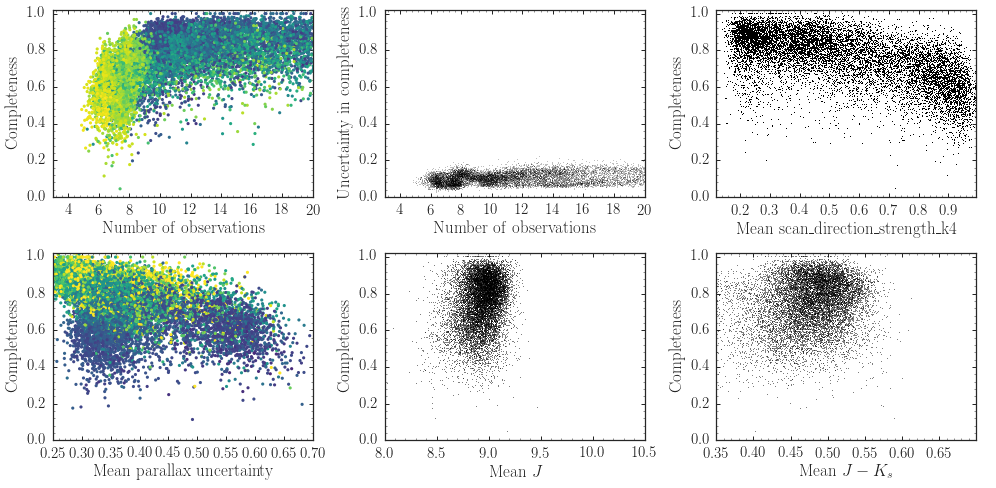

In [86]:
figsize(14,7)
subplot(2,3,1)
bovy_plot.bovy_plot(nobs,nstar.astype('float')/a[1],gcf=True,
                   xrange=[3.,20.],yrange=[0.,1.02],alpha=1.,scatter=True,
                    c=mscd,s=10.,edgecolors='None',cmap='viridis',vmin=0.,vmax=1.,
                   xlabel=r'$\mathrm{Number\ of\ observations}$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,2)
bovy_plot.bovy_plot(nobs,numpy.sqrt(nstar.astype('float'))/a[1],'k,',gcf=True,
                   xrange=[3.,20.],yrange=[0.,1.02],alpha=.25,
                   xlabel=r'$\mathrm{Number\ of\ observations}$',
                   ylabel=r'$\mathrm{Uncertainty\ in\ completeness}$')
subplot(2,3,3)
bovy_plot.bovy_plot(mscd,nstar.astype('float')/a[1],'k,',gcf=True,
                    yrange=[0.,1.02],
                   xlabel=r'$\mathrm{Mean\ scan\_direction\_strength\_k4}$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,4)
bovy_plot.bovy_plot(mplxerr,nstar.astype('float')/a[1],gcf=True,
                   xrange=[0.25,.7],yrange=[0.,1.02],scatter=True,
                    c=nobs,s=10.,edgecolors='None',cmap='viridis',vmin=3.,vmax=20.,
                   xlabel=r'$\mathrm{Mean\ parallax\ uncertainty}$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,5)
bovy_plot.bovy_plot(mj,nstar.astype('float')/a[1],'k,',gcf=True,
                   xrange=[8.,10.5],yrange=[0.,1.02],alpha=.5,
                   xlabel=r'$\mathrm{Mean}\ J$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,6)
bovy_plot.bovy_plot(mjk,nstar.astype('float')/a[1],'k,',gcf=True,
                   xrange=[0.35,0.7],yrange=[0.,1.02],alpha=.5,
                   xlabel=r'$\mathrm{Mean}\ J-K_s$',
                   ylabel=r'$\mathrm{Completeness}$')
tight_layout()

The distribution of mean parallax uncertainties has a distinct second bump that is associated with low completeness, most likely due to observational limitations:

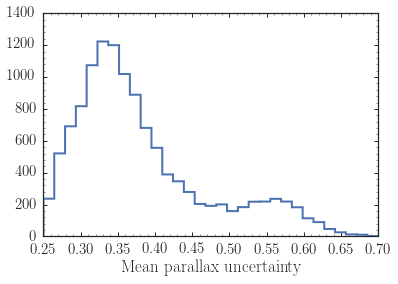

In [37]:
figsize(6,4)
_= bovy_plot.bovy_hist(mplxerr,range=[0.25,0.7],bins=31,
                       histtype='step',lw=2.,
                       xlabel=r'$\mathrm{Mean\ parallax\ uncertainty}$')

The distribution of the spread in the scan directions also has a distinct second bump that is associated with low completeness, most likely due to observational limitations:

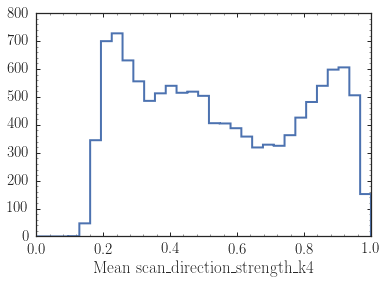

In [88]:
figsize(6,4)
_= bovy_plot.bovy_hist(mscd,range=[0.,1.],bins=31,
                       histtype='step',lw=2.,
                       xlabel=r'$\mathrm{Mean\ scan\_direction\_strength\_k4}$')

Let's cut the sky to pixels with more than 8.5 observations, with a spread in scan directions less than 0.7, with a spread in the number of observations < 10, and with an absolute Ecliptic latitude less than 20 degree :

Fraction of the sky covered: 0.48


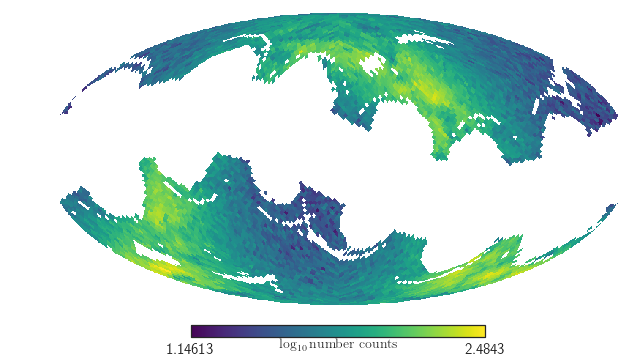

In [99]:
pt= numpy.log10(nstar)
min_nobs= 8.5
max_nobs= 10000000000.
max_nobs_std= 10.
max_plxerr= 1.45 # Effectively turns this off
max_scd= 0.7
min_comp= 0.
min_lat= 20.
exclude_mask= (nobs < min_nobs)+(nobs > max_nobs)+(nobs_std > max_nobs_std)+(nstar.astype('float')/a[1]< min_comp)\
      +(numpy.fabs(elats) < min_lat)+(mplxerr > max_plxerr)+(mscd > max_scd)
pt[exclude_mask]= numpy.nan
print("Fraction of the sky covered: %.2f" % (1.-numpy.sum(numpy.isnan(pt))/float(len(nobs))))
healpy.mollview(pt,nest=True,unit=r'$\log_{10} \mathrm{number\ counts}$',cmap=cmap,title="")

Median completeness: 0.85


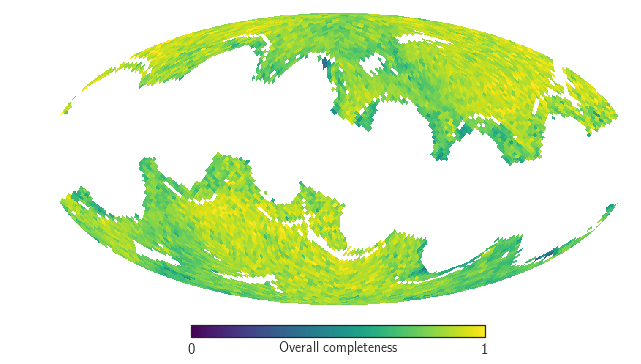

In [100]:
pt= (nstar/a[1])
pt[exclude_mask]= numpy.nan
healpy.mollview(pt,nest=True,unit='Overall completeness',cmap=cmap,min=0.,max=1.,title="")
ls= numpy.linspace(0.,2.*numpy.pi,201)
radecs= bovy_coords.lb_to_radec(ls,numpy.zeros_like(ls))
thetas= numpy.pi/2.-radecs[:,1]
#healpy.projplot(thetas,radecs[:,0],'w')
print("Median completeness: %.2f" % (numpy.nanmedian(pt)))

The figures from above then become:

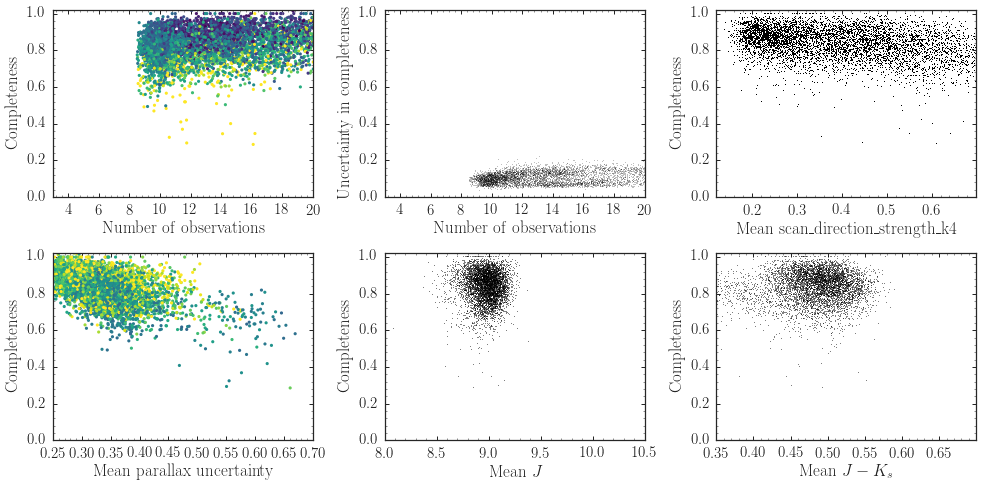

In [102]:
figsize(14,7)
subplot(2,3,1)
bovy_plot.bovy_plot(nobs[True-exclude_mask],(nstar.astype('float')/a[1])[True-exclude_mask],gcf=True,
                   xrange=[3.,20.],yrange=[0.,1.02],alpha=1.,scatter=True,
                    c=mplxerr[True-exclude_mask],s=10.,edgecolors='None',cmap='viridis',vmin=0.25,vmax=0.45,
                   xlabel=r'$\mathrm{Number\ of\ observations}$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,2)
bovy_plot.bovy_plot(nobs[True-exclude_mask],(numpy.sqrt(nstar.astype('float'))/a[1])[True-exclude_mask],'k,',gcf=True,
                   xrange=[3.,20.],yrange=[0.,1.02],alpha=.25,
                   xlabel=r'$\mathrm{Number\ of\ observations}$',
                   ylabel=r'$\mathrm{Uncertainty\ in\ completeness}$')
subplot(2,3,3)
bovy_plot.bovy_plot(mscd[True-exclude_mask],(nstar.astype('float')/a[1])[True-exclude_mask],
                    'k,',gcf=True,
                    yrange=[0.,1.02],
                   xlabel=r'$\mathrm{Mean\ scan\_direction\_strength\_k4}$',
                   ylabel=r'$\mathrm{Completeness}$')

subplot(2,3,4)
bovy_plot.bovy_plot(mplxerr[True-exclude_mask],(nstar.astype('float')/a[1])[True-exclude_mask],gcf=True,
                   xrange=[0.25,.7],yrange=[0.,1.02],scatter=True,
                    c=nobs[True-exclude_mask],s=10.,edgecolors='None',cmap='viridis',vmin=3.,vmax=20.,
                   xlabel=r'$\mathrm{Mean\ parallax\ uncertainty}$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,5)
bovy_plot.bovy_plot(mj[True-exclude_mask],(nstar.astype('float')/a[1])[True-exclude_mask],'k,',gcf=True,
                   xrange=[8.,10.5],yrange=[0.,1.02],alpha=.5,
                   xlabel=r'$\mathrm{Mean}\ J$',
                   ylabel=r'$\mathrm{Completeness}$')
subplot(2,3,6)
bovy_plot.bovy_plot(mjk[True-exclude_mask],(nstar.astype('float')/a[1])[True-exclude_mask],'k,',gcf=True,
                   xrange=[0.35,0.7],yrange=[0.,1.02],alpha=.5,
                   xlabel=r'$\mathrm{Mean}\ J-K_s$',
                   ylabel=r'$\mathrm{Completeness}$')
tight_layout()

The distribution of completenesses compared to the uncertainty in the complenetess is then:

Scatter in completeness: 0.08, Uncertainty in completeness: 0.10


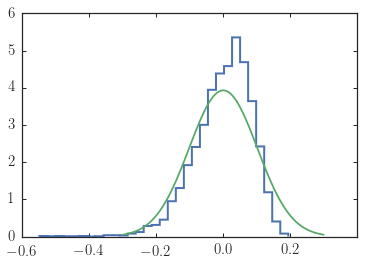

In [103]:
figsize(6,4)
sindx= True-exclude_mask
_= hist((nstar.astype('float')/n2)[sindx]-numpy.mean((nstar.astype('float')/n2)[sindx]),bins=31,histtype='step',
        lw=2.,normed=True)
xs= numpy.linspace(-0.3,0.3,101)
s= numpy.median((numpy.sqrt(nstar).astype('float')/n2)[sindx])
plot(xs,1./numpy.sqrt(2.*numpy.pi)/s*numpy.exp(-0.5*xs**2./s**2.))
print("Scatter in completeness: %.2f, Uncertainty in completeness: %.2f" %\
     (numpy.std((nstar.astype('float')/n2)[sindx]),s))

Overall these distributions are in good agreement, thus consistent with having a single completeness over this part of the sky. There appears to be a trend left with Galactic latitude, which may be due to the fact that the magnitude distribution is different close to the plane (fainter, thus having slightly lower completeness).

## Spatial, color, and magnitude dependence

Let's now go in more detail in this half of the sky and see what the color and magnitude dependence is.

In [104]:
# The following needs to be performed on the server with the 2MASS database, note that the " might get messed up
"""
import psycopg2
conn= psycopg2.connect("dbname=catalogs user=postgres")
cur= conn.cursor()
cur.execute("select floor(j_m*10), floor((j_m-k_m)*20), floor(hp12index/16384), count(*) as count \
from twomass_psc, twomass_psc_hp12 \
where (twomass_psc.pts_key = twomass_psc_hp12.pts_key \
AND (ph_qual like 'A__' OR (rd_flg like '1__' OR rd_flg like '3__')) \
AND (ph_qual like '__A' OR (rd_flg like '__1' OR rd_flg like '__3')) AND use_src='1' AND ext_key is null \
AND (j_m-k_m) > 0. AND (j_m-k_m) < 0.8 AND j_m < 12)\
group by floor(j_m*10),floor((j_m-k_m)*20),floor(hp12index/16384) \
order by floor(j_m*10) ASC;")
import numpy
a= numpy.array(cur.fetchall(),dtype='float')
numpy.savetxt('2massc_jk_j_hp5.txt',a)
"""
a= numpy.loadtxt('2massc_jk_j_hp5.txt').T
# Make value center of bin and re-normalize
a[0]+= 0.5
a[1]+= 0.5
a[0]/= 10.
a[1]/= 20.

The full-sky completeness again:

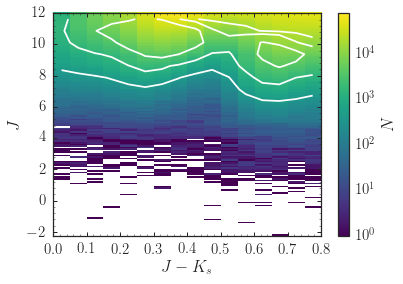

In [105]:
figsize(6,4)
findx= (full_jk > 0.)*(full_jk < 0.8)*(full_twomass['j_mag'] < 12.)
levels= list(special.erf(numpy.arange(1,4)/numpy.sqrt(4.)))
levels.append(1.01)
levels= numpy.array(levels)
bovy_plot.scatterplot((full_twomass['j_mag']-full_twomass['k_mag'])[findx],full_twomass['j_mag'][findx],
                      xrange=[0.,0.8],yrange=[0.,12.],
                      xlabel=r'$J-K_s$',ylabel=r'$J$',
                      zorder=10,
                      justcontours=True,cntrcolors='w',levels=levels,bins=16)
out= pyplot.hist2d(a[1],a[0],weights=a[3],cmap='viridis',norm=LogNorm(),
                   range=[[0.,0.8],[-2.3,12.]],
                   bins=[16,143])
cbar= pyplot.colorbar(out[3],fraction=0.15)
#cbar.set_clim(*climits)
cbar.set_label(r'$N$')

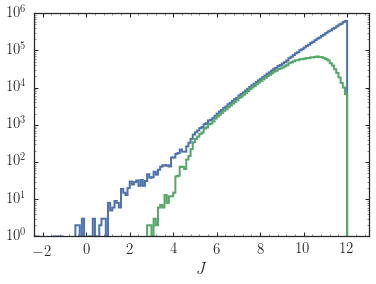

In [106]:
_= bovy_plot.bovy_hist(a[0],weights=a[3],
                       histtype='step',lw=2.,
                       range=[-2.3,12.],bins=143,xrange=[-2.4,13.],
                       xlabel=r'$J$')
pyplot.gca().set_yscale('log')
_= bovy_plot.bovy_hist(full_twomass['j_mag'][findx],range=[0.,15.8],bins=158,overplot=True,lw=2.,histtype='step')

The completeness in the 'good' part of the sky:

In [107]:
nstar2mass, edges= numpy.histogramdd(a[:3].T,bins=[143,16,healpy.nside2npix(nside)],
                                     range=[[-2.3,12.],[0.,0.8],[-0.5,healpy.nside2npix(nside)-0.5]],
                                     weights=a[3])
nstartgas, edges= numpy.histogramdd(numpy.array([full_twomass['j_mag'][findx],
                                                full_twomass['j_mag'][findx]-full_twomass['k_mag'][findx],
                                                (full_tgas['source_id'][findx]/2**(35.+2*(12.-numpy.log2(nside))))\
                                                 .astype('int')]).T,
                                    bins=[143,16,healpy.nside2npix(nside)],
                                    range=[[-2.3,12.],[0.,0.8],[-0.5,healpy.nside2npix(nside)-0.5]])

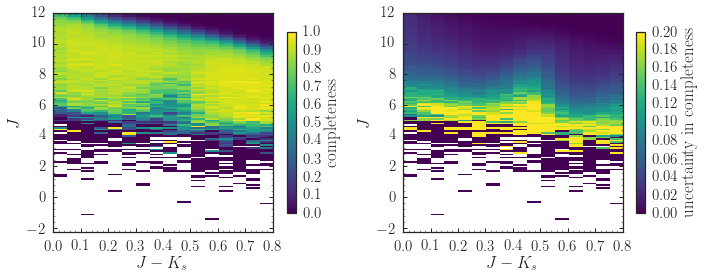

In [108]:
figsize(10,4)
nstar2mass[:,:,exclude_mask]= numpy.nan
nstartgas[:,:,exclude_mask]= numpy.nan
subplot(1,2,1)
bovy_plot.bovy_dens2d(numpy.nansum(nstartgas,axis=-1)/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=1.,shrink=0.78,zlabel=r'$\mathrm{completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J$')
subplot(1,2,2)
bovy_plot.bovy_dens2d(numpy.sqrt(numpy.nansum(nstartgas,axis=-1))/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=.2,shrink=0.78,zlabel=r'$\mathrm{uncertainty\ in\ completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J$')
tight_layout()

This is a sloping function of $J-K_s$, but otherwise looks rather uniform. Let's look at $G-J$ vs. $J-K_s$ to get inspiration about a good transformation of $J$ to make the completeness color independent.

[-0.72821664  2.49977978  0.2047365 ]
[ 1.   2.5  0.2]


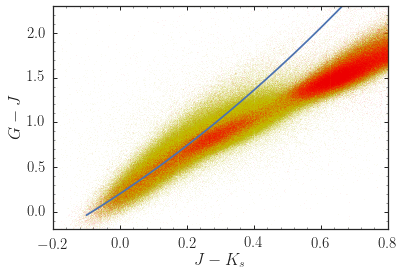

In [109]:
figsize(6,4)
pindx= (full_twomass['j_mag'] > 8.)*(full_twomass['j_mag'] < 12.)
bovy_plot.bovy_plot((full_twomass['j_mag']-full_twomass['k_mag'])[pindx],
                    (full_tgas['phot_g_mean_mag']-full_twomass['j_mag'])[pindx],
                    'y,',alpha=0.05,
                    xrange=[-0.2,0.8],yrange=[-0.2,2.3],
                   xlabel=r'$J-K_s$',ylabel=r'$G-J$')
pindx= (full_twomass['j_mag'] > 4.)*(full_twomass['j_mag'] < 8.)
bovy_plot.bovy_plot((full_twomass['j_mag']-full_twomass['k_mag'])[pindx],
                    (full_tgas['phot_g_mean_mag']-full_twomass['j_mag'])[pindx],
                    'r,',alpha=0.05,zorder=2,overplot=True)
# Quite the fit here!
pindx= (full_twomass['j_mag'] > 4.)*(full_twomass['j_mag'] < 10.)\
        *((full_twomass['j_mag']-full_twomass['k_mag']) > 0.0)\
        *((full_twomass['j_mag']-full_twomass['k_mag']) < 1.)\
        *(True-numpy.isnan(full_twomass['j_mag']))*(True-numpy.isnan(full_twomass['k_mag']))
p= numpy.polyfit((full_twomass['j_mag']-full_twomass['k_mag'])[pindx],
                 (full_tgas['phot_g_mean_mag']-full_twomass['j_mag'])[pindx],deg=2,
                w=1./((full_twomass['j_mag']-full_twomass['k_mag'])[pindx]+.3)**2.5)
xs= numpy.linspace(-0.1,1.,201)
print(p)
p[0]= +1.
p[1]= 2.5
p[2]= 0.2
print(p)
plot(xs,numpy.polyval(p,xs))

Now let's look at the completeness in terms of a new $J+\Delta J$:

In [110]:
# The following needs to be performed on the server with the 2MASS database, note that the " might get messed up
"""
import psycopg2
conn= psycopg2.connect("dbname=catalogs user=postgres")
cur= conn.cursor()
cur.execute("select floor((j_m+(j_m-k_m)*(j_m-k_m)+2.5*(j_m-k_m)+0.2)*10), \
floor((j_m-k_m)*20), floor(hp12index/16384), count(*) as count \
from twomass_psc, twomass_psc_hp12 \
where (twomass_psc.pts_key = twomass_psc_hp12.pts_key \
AND (ph_qual like 'A__' OR (rd_flg like '1__' OR rd_flg like '3__')) \
AND (ph_qual like '__A' OR (rd_flg like '__1' OR rd_flg like '__3')) AND use_src='1' AND ext_key is null \
AND (j_m-k_m) > -0.05 AND (j_m-k_m) < 1.0 AND j_m < 14)\
group by floor((j_m+(j_m-k_m)*(j_m-k_m)+2.5*(j_m-k_m)+0.2)*10),floor((j_m-k_m)*20),floor(hp12index/16384) \
order by floor((j_m+(j_m-k_m)*(j_m-k_m)+2.5*(j_m-k_m)+0.2)*10) ASC;")
import numpy
a= numpy.array(cur.fetchall(),dtype='float')
numpy.savetxt('2massc_jk_jt_hp5.txt',a)
"""
a= numpy.loadtxt('2massc_jk_jt_hp5.txt').T
# Make value center of bin and re-normalize
a[0]+= 0.5
a[1]+= 0.5
a[0]/= 10.
a[1]/= 20.

In [111]:
nstar2mass, edges= numpy.histogramdd(a[:3].T,bins=[158,21,healpy.nside2npix(nside)],
                                     range=[[-2.3,13.5],[-0.05,1.0],[-0.5,healpy.nside2npix(nside)-0.5]],
                                     weights=a[3])
findx= (full_jk > -0.05)*(full_jk < 1.0)*(full_twomass['j_mag'] < 14.)
nstartgas, edges= numpy.histogramdd(numpy.array([full_twomass['j_mag'][findx]
                                                 +numpy.polyval(p,full_twomass['j_mag'][findx]-full_twomass['k_mag'][findx]),
                                                full_twomass['j_mag'][findx]-full_twomass['k_mag'][findx],
                                                (full_tgas['source_id'][findx]/2**(35.+2*(12.-numpy.log2(nside))))\
                                                 .astype('int')]).T,
                                    bins=[158,21,healpy.nside2npix(nside)],
                                    range=[[-2.3,13.5],[-0.05,1.0],[-0.5,healpy.nside2npix(nside)-0.5]])

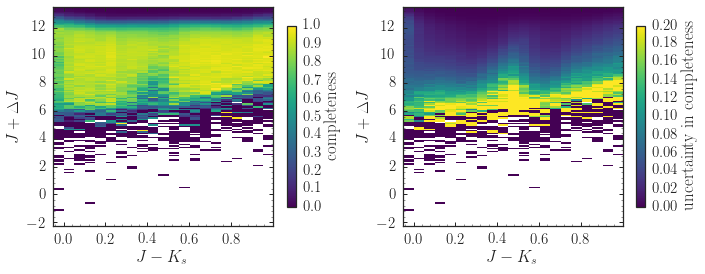

In [112]:
figsize(10,4)
nstar2mass[:,:,exclude_mask]= numpy.nan
nstartgas[:,:,exclude_mask]= numpy.nan
subplot(1,2,1)
bovy_plot.bovy_dens2d(numpy.nansum(nstartgas,axis=-1)/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=1.,shrink=0.78,zlabel=r'$\mathrm{completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J+\Delta J$')
subplot(1,2,2)
bovy_plot.bovy_dens2d(numpy.sqrt(numpy.nansum(nstartgas,axis=-1))/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=.2,shrink=0.78,zlabel=r'$\mathrm{uncertainty\ in\ completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J+\Delta J$')
tight_layout()

This looks rater independent of color at the faint end. Let's look at the overall completeness as a funtion of $J+\Delta J$ and how it looks in four color bins:

('Peak completeness:', 0.9212765957446809)


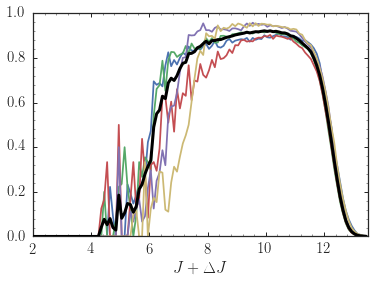

In [113]:
figsize(6,4)
exs= 0.5*(numpy.roll(edges[0],1)+edges[0])[1:]
full_comp_j= numpy.nansum(numpy.nansum(nstartgas,axis=-1),axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1),axis=-1)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1),axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1),axis=-1),
                   xrange=[2.,13.5],yrange=[0.,1.],lw=3.,zorder=9,color='k',xlabel=r'$J+\Delta J$')
# A few J-Ks bins
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,:4],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,:4],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,4:8],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,4:8],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,8:12],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,8:12],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,12:16],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,12:16],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,16:],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,16:],axis=-1),
                    overplot=True)
tmp= numpy.nansum(numpy.nansum(nstartgas,axis=-1),axis=-1)/numpy.nansum(numpy.nansum(nstar2mass,axis=-1),axis=-1)
tmp[numpy.isinf(tmp)]= 0.
print("Peak completeness:",numpy.nanmax(tmp))

What if we look at some different patches of the sky?

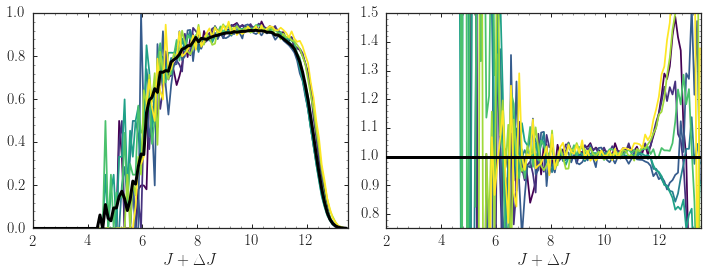

In [114]:
figsize(10,4)
subplot(1,2,1)
gcindx= numpy.ones(nstar2mass.shape[1],dtype='bool')
gcindx[8:14]= False
full_comp_j= numpy.nansum(numpy.nansum(nstartgas[:,gcindx],axis=-1),axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass[:,gcindx],axis=-1),axis=-1)
bovy_plot.bovy_plot(exs,full_comp_j,gcf=True,
                   xrange=[2.,13.5],yrange=[0.,1.],lw=3.,zorder=9,color='k',xlabel=r'$J+\Delta J$')
subplot(1,2,2)
bovy_plot.bovy_plot(exs,numpy.ones_like(exs),gcf=True,
                   xrange=[2.,13.5],yrange=[0.75,1.5],lw=3.,zorder=9,color='k',xlabel=r'$J+\Delta J$')
# A few sky bins
#for lcen, bcen in zip([30.,-30.,180.,235.],[5.,75.,-40.,10.]):
bs= numpy.arange(-70.,75.,20.)
ls= [-60.,-40.,60.,80.,100.,120.,40.,160.]
gcindx= numpy.ones(nstar2mass.shape[1],dtype='bool')
gcindx[8:14]= False
for lcen, bcen in zip(ls,bs):
    ra_cen, dec_cen= bovy_coords.lb_to_radec(lcen,bcen,degree=True)
    _DEGTORAD= numpy.pi/180.
    vec= healpy.pixelfunc.ang2vec((90.-dec_cen)*_DEGTORAD,ra_cen*_DEGTORAD)
    radius= 30.
    ipixs= healpy.query_disc(nside,vec,radius*_DEGTORAD,inclusive=False,nest=True)
    iindx= numpy.zeros(healpy.nside2npix(nside),dtype='bool')
    iindx[ipixs]= True
    subplot(1,2,1)
    bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas[:,gcindx][:,:,iindx],axis=-1),axis=-1)/\
                                numpy.nansum(numpy.nansum(nstar2mass[:,gcindx][:,:,iindx],axis=-1),axis=-1),
                        overplot=True,color=cmap((bcen+70.)/140.))
    subplot(1,2,2)
    bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas[:,gcindx][:,:,iindx],axis=-1),axis=-1)/\
                                numpy.nansum(numpy.nansum(nstar2mass[:,gcindx][:,:,iindx],axis=-1),axis=-1)/full_comp_j,
                        overplot=True,color=cmap((bcen+70.)/140.))
tight_layout()

Overall looks pretty good, although at the faint end there is some sky-location dependence left! However, if we hadn't cut to the 'good' part of the sky, the curves would start to diverge at $J+\Delta J \approx 10$, 1.5 mag brighter.

How about when we cut on parallax uncertainty?

In [115]:
nstar2mass, edges= numpy.histogramdd(a[:3].T,bins=[158,21,healpy.nside2npix(nside)],
                                     range=[[-2.3,13.5],[-0.05,1.0],[-0.5,healpy.nside2npix(nside)-0.5]],
                                     weights=a[3])
findx= (full_jk > -0.05)*(full_jk < 1.0)*(full_twomass['j_mag'] < 14.)
findx*= (full_tgas['parallax_error'] < 0.5)
nstartgas, edges= numpy.histogramdd(numpy.array([full_twomass['j_mag'][findx]
                                                 +numpy.polyval(p,full_twomass['j_mag'][findx]-full_twomass['k_mag'][findx]),
                                                full_twomass['j_mag'][findx]-full_twomass['k_mag'][findx],
                                                (full_tgas['source_id'][findx]/2**(35.+2*(12.-numpy.log2(nside))))\
                                                 .astype('int')]).T,
                                    bins=[158,21,healpy.nside2npix(nside)],
                                    range=[[-2.3,13.5],[-0.05,1.0],[-0.5,healpy.nside2npix(nside)-0.5]])

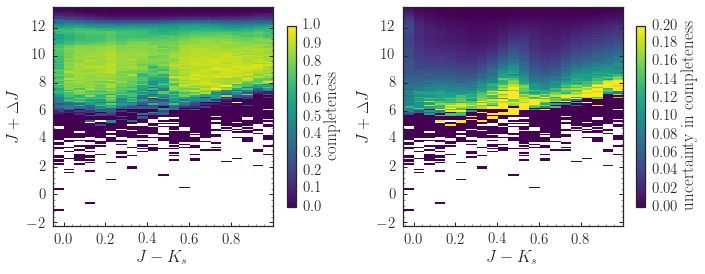

In [116]:
figsize(10,4)
nstar2mass[:,:,exclude_mask]= numpy.nan
nstartgas[:,:,exclude_mask]= numpy.nan
subplot(1,2,1)
bovy_plot.bovy_dens2d(numpy.nansum(nstartgas,axis=-1)/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=1.,shrink=0.78,zlabel=r'$\mathrm{completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J+\Delta J$')
subplot(1,2,2)
bovy_plot.bovy_dens2d(numpy.sqrt(numpy.nansum(nstartgas,axis=-1))/numpy.nansum(nstar2mass,axis=-1),
                      origin='lower',cmap='viridis',interpolation='nearest',gcf=True,
                      colorbar=True,vmin=0.,vmax=.2,shrink=0.78,zlabel=r'$\mathrm{uncertainty\ in\ completeness}$',
                      yrange=[edges[0][0],edges[0][-1]],
                      xrange=[edges[1][0],edges[1][-1]],
                      xlabel=r'$J-K_s$',ylabel=r'$J+\Delta J$')
tight_layout()

('Peak completeness:', 0.86980524459438735)


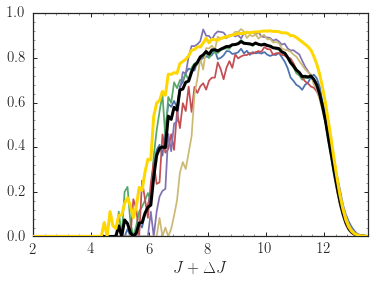

In [117]:
figsize(6,4)
exs= 0.5*(numpy.roll(edges[0],1)+edges[0])[1:]
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas[:,gcindx],axis=-1),axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass[:,gcindx],axis=-1),axis=-1),
                   xrange=[2.,13.5],yrange=[0.,1.],lw=3.,zorder=9,color='k',xlabel=r'$J+\Delta J$')
bovy_plot.bovy_plot(exs,full_comp_j,
                   xrange=[2.,13.],yrange=[0.,1.],lw=3.,zorder=9,color='gold',overplot=True)
# A few J-Ks bins
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,:4],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,:4],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,4:8],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,4:8],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,8:12],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,8:12],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,12:16],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,12:16],axis=-1),
                    overplot=True)
bovy_plot.bovy_plot(exs,numpy.nansum(numpy.nansum(nstartgas,axis=-1)[:,16:],axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1)[:,16:],axis=-1),
                    overplot=True)
tmp= numpy.nansum(numpy.nansum(nstartgas,axis=-1),axis=-1)/numpy.nansum(numpy.nansum(nstar2mass,axis=-1),axis=-1)
tmp[numpy.isinf(tmp)]= 0.
print("Peak completeness:",numpy.nanmax(tmp))

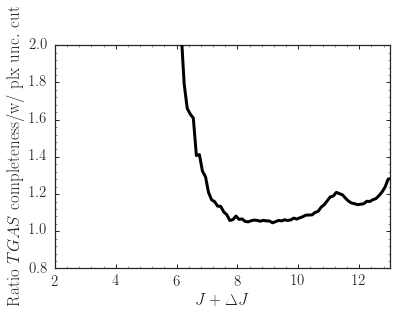

In [118]:
bovy_plot.bovy_plot(exs,full_comp_j/(numpy.nansum(numpy.nansum(nstartgas,axis=-1),axis=-1)/\
                            numpy.nansum(numpy.nansum(nstar2mass,axis=-1),axis=-1)),
                   xrange=[2.,13.],yrange=[0.8,2.],lw=3.,zorder=9,color='k',xlabel=r'$J+\Delta J$',
                   ylabel=r'$\mathrm{Ratio}\ TGAS\ \mathrm{completeness} / \mathrm{w/\ plx\ unc.\ cut}$')

The following are the fields in the *TGAS* and *2MASS* catalogs

In [57]:
tgas.dtype.fields

<dictproxy {'astrometric_delta_q': (dtype('>f4'), 192),
 'astrometric_excess_noise': (dtype('>f8'), 196),
 'astrometric_excess_noise_sig': (dtype('>f8'), 204),
 'astrometric_n_bad_obs_ac': (dtype('>i4'), 188),
 'astrometric_n_bad_obs_al': (dtype('>i4'), 184),
 'astrometric_n_good_obs_ac': (dtype('>i4'), 180),
 'astrometric_n_good_obs_al': (dtype('>i4'), 176),
 'astrometric_n_obs_ac': (dtype('>i4'), 172),
 'astrometric_n_obs_al': (dtype('>i4'), 168),
 'astrometric_primary_flag': (dtype('bool'), 212),
 'astrometric_priors_used': (dtype('>i4'), 225),
 'astrometric_relegation_factor': (dtype('>f4'), 213),
 'astrometric_weight_ac': (dtype('>f4'), 221),
 'astrometric_weight_al': (dtype('>f4'), 217),
 'b': (dtype('>f8'), 313),
 'dec': (dtype('>f8'), 64),
 'dec_error': (dtype('>f8'), 72),
 'dec_parallax_corr': (dtype('>f4'), 144),
 'dec_pmdec_corr': (dtype('>f4'), 152),
 'dec_pmra_corr': (dtype('>f4'), 148),
 'duplicated_source': (dtype('bool'), 231),
 'ecl_lat': (dtype('>f8'), 329),
 'ecl_lon

In [58]:
twomass.dtype.fields

<dictproxy {'association': (dtype('S1'), 115),
 'b_m_opt': (dtype('>f4'), 95),
 'coadd': (dtype('>i2'), 120),
 'coadd_key': (dtype('>i4'), 116),
 'date_day': (dtype('uint8'), 60),
 'date_month': (dtype('uint8'), 59),
 'date_year': (dtype('>i2'), 57),
 'dec': (dtype('>f8'), 8),
 'designation': (dtype('S17'), 29),
 'dist_edge_ew': (dtype('>f4'), 107),
 'dist_edge_ns': (dtype('>f4'), 103),
 'dist_flag_ew': (dtype('bool'), 112),
 'dist_flag_ns': (dtype('bool'), 111),
 'dist_opt': (dtype('>f4'), 91),
 'dup_src': (dtype('uint8'), 113),
 'err_angle': (dtype('uint8'), 28),
 'err_major': (dtype('>f4'), 20),
 'err_minor': (dtype('>f4'), 24),
 'galaxy_contam': (dtype('uint8'), 47),
 'glat': (dtype('>f4'), 82),
 'glon': (dtype('>f4'), 78),
 'h_blend': (dtype('uint8'), 190),
 'h_cc': (dtype('S1'), 191),
 'h_cmsig': (dtype('>f4'), 168),
 'h_m_stdap': (dtype('>f4'), 176),
 'h_mag': (dtype('>f4'), 164),
 'h_msig_stdap': (dtype('>f4'), 180),
 'h_msigcom': (dtype('>f4'), 172),
 'h_ndet_m': (dtype('uint8